In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from format_io import h5_to_df

from akita_utils.seq_gens import split_concat_to_integers, split_concat_to_strings

2023-01-17 10:58:22.137481: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home1/smaruj/software/GSL/lib:/home1/smaruj/software/HTSLIB/lib
2023-01-17 10:58:22.137516: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def average_over_targets(dataframe, stat, mouse=True, model=1):
    
    num_targets = 6
    if not mouse:
        num_targets = 5
    
    collist = [stat + f"_h{int(mouse)}_m{model}_t{i}" for i in range(num_targets)]
    
    dataframe[f"{stat}_average"] = dataframe[collist].mean(axis=1)
    
    return dataframe

In [3]:
path = "./100VS100medium/scd.h5"
scd_stats=["SCD"]

In [4]:
df = h5_to_df(path, scd_stats, drop_duplicates_key=None)

In [5]:
df = average_over_targets(df, "SCD")

In [6]:
df

,SCD_h1_m1_t0,SCD_h1_m1_t1,SCD_h1_m1_t2,SCD_h1_m1_t3,SCD_h1_m1_t4,SCD_h1_m1_t5,background_index,chrom,end,flank_bp,genomic_SCD,orientation,spacer_bp,start,strand,SCD_average
0,33.50000,17.562500,47.75000,50.65625,42.34375,42.00000,1,"chr2,chr2","96583103,96583103",25,"1.146484375,1.146484375",>>,65,"96583084,96583084","-,-",38.96875
1,33.65625,17.750000,47.71875,50.59375,42.37500,42.00000,1,"chr2,chr11","96583103,4135567",25,"1.146484375,1.146484375",>>,65,"96583084,4135548","-,-",39.03125
2,33.56250,17.671875,47.71875,50.62500,42.37500,42.03125,1,"chr2,chr11","96583103,109227342",25,"1.146484375,1.138671875",>>,65,"96583084,109227323","-,+",39.00000
3,33.59375,17.656250,47.78125,50.68750,42.40625,42.06250,1,"chr2,chr16","96583103,72985382",25,"1.146484375,1.138671875",>>,65,"96583084,72985363","-,-",39.03125
4,33.62500,17.656250,47.84375,50.78125,42.46875,42.09375,1,"chr2,chr9","96583103,40805083",25,"1.146484375,1.13671875",>>,65,"96583084,40805064","-,-",39.09375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,45.71875,40.250000,58.87500,62.53125,54.78125,49.31250,3,"chr19,chr9","56805564,10903404",25,"0.9443359375,0.9482421875",>>,65,"56805545,10903385","+,-",51.90625
29996,44.21875,36.937500,56.78125,60.71875,52.53125,47.68750,3,"chr19,chr8","56805564,32008899",25,"0.9443359375,0.9462890625",>>,65,"56805545,32008880","+,+",49.78125
29997,47.00000,43.312500,58.78125,61.84375,55.53125,49.65625,3,"chr19,chr2","56805564,27778967",25,"0.9443359375,0.94580078125",>>,65,"56805545,27778948","+,-",52.71875
29998,44.65625,37.781250,57.28125,61.15625,53.06250,48.06250,3,"chr19,chr5","56805564,137787854",25,"0.9443359375,0.94580078125",>>,65,"56805545,137787835","+,-",50.34375


In [7]:
df["core_start"] = df["start"].apply(lambda x: x.split(",")[0])
df["flank_start"] = df["start"].apply(lambda x: x.split(",")[1])

In [8]:
df

,SCD_h1_m1_t0,SCD_h1_m1_t1,SCD_h1_m1_t2,SCD_h1_m1_t3,SCD_h1_m1_t4,SCD_h1_m1_t5,background_index,chrom,end,flank_bp,genomic_SCD,orientation,spacer_bp,start,strand,SCD_average,core_start,flank_start
0,33.50000,17.562500,47.75000,50.65625,42.34375,42.00000,1,"chr2,chr2","96583103,96583103",25,"1.146484375,1.146484375",>>,65,"96583084,96583084","-,-",38.96875,96583084,96583084
1,33.65625,17.750000,47.71875,50.59375,42.37500,42.00000,1,"chr2,chr11","96583103,4135567",25,"1.146484375,1.146484375",>>,65,"96583084,4135548","-,-",39.03125,96583084,4135548
2,33.56250,17.671875,47.71875,50.62500,42.37500,42.03125,1,"chr2,chr11","96583103,109227342",25,"1.146484375,1.138671875",>>,65,"96583084,109227323","-,+",39.00000,96583084,109227323
3,33.59375,17.656250,47.78125,50.68750,42.40625,42.06250,1,"chr2,chr16","96583103,72985382",25,"1.146484375,1.138671875",>>,65,"96583084,72985363","-,-",39.03125,96583084,72985363
4,33.62500,17.656250,47.84375,50.78125,42.46875,42.09375,1,"chr2,chr9","96583103,40805083",25,"1.146484375,1.13671875",>>,65,"96583084,40805064","-,-",39.09375,96583084,40805064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,45.71875,40.250000,58.87500,62.53125,54.78125,49.31250,3,"chr19,chr9","56805564,10903404",25,"0.9443359375,0.9482421875",>>,65,"56805545,10903385","+,-",51.90625,56805545,10903385
29996,44.21875,36.937500,56.78125,60.71875,52.53125,47.68750,3,"chr19,chr8","56805564,32008899",25,"0.9443359375,0.9462890625",>>,65,"56805545,32008880","+,+",49.78125,56805545,32008880
29997,47.00000,43.312500,58.78125,61.84375,55.53125,49.65625,3,"chr19,chr2","56805564,27778967",25,"0.9443359375,0.94580078125",>>,65,"56805545,27778948","+,-",52.71875,56805545,27778948
29998,44.65625,37.781250,57.28125,61.15625,53.06250,48.06250,3,"chr19,chr5","56805564,137787854",25,"0.9443359375,0.94580078125",>>,65,"56805545,137787835","+,-",50.34375,56805545,137787835


In [9]:
df_grouped = df.groupby(["core_start", "flank_start", "flank_bp"]).agg({"SCD_average": "mean"}).reset_index()

In [10]:
df_grouped

,core_start,flank_start,flank_bp,SCD_average
0,10004575,10004575,25,42.59375
1,10004575,104231439,25,42.53125
2,10004575,10903385,25,43.15625
3,10004575,109227323,25,42.50000
4,10004575,113424899,25,42.43750
...,...,...,...,...
9995,99599099,95581714,25,42.40625
9996,99599099,96583084,25,42.37500
9997,99599099,96616867,25,43.68750
9998,99599099,96697889,25,42.43750


In [11]:
all_starts = list(df_grouped.core_start.unique())
all_names = [f"motif {i}" for i in range(len(all_starts))]

In [12]:
dict_of_names = dict(zip(all_starts, all_names))

In [13]:
summary_matrix = np.zeros((len(all_starts), (len(all_starts))))

In [ ]:
df_grouped.core_start.unique()

array(['10004575', '104231439', '10903385', '109227323', '113424899',
       '11422225', '115544679', '11609742', '116196511', '116713866',
       '117384917', '117505369', '118903219', '119242981', '12026855',
       '122187246', '127190482', '127340805', '137787835', '138194653',
       '14191956', '144752623', '153909691', '165399623', '16780574',
       '168669887', '17722828', '20496102', '21546181', '23402012',
       '24549004', '24635116', '25791251', '26771251', '27190228',
       '27469564', '27778948', '32008880', '33032319', '3492301',
       '3492306', '35880222', '36276399', '38239861', '38431269',
       '38830484', '39523418', '39527137', '40805064', '4108576',
       '4135548', '42825204', '43046156', '4773435', '4777268',
       '48101340', '49966373', '50138037', '54651736', '56571470',
       '56805545', '57824036', '5942968', '60786621', '62192816',
       '62194795', '64942611', '64960292', '66119994', '69166603',
       '71008861', '72951824', '72985363', '733006

In [14]:
counter = 0

for core_start in df_grouped.core_start.unique():
    summary_matrix[counter] += df_grouped[df_grouped["core_start"] == core_start]["SCD_average"].values
    counter += 1
    

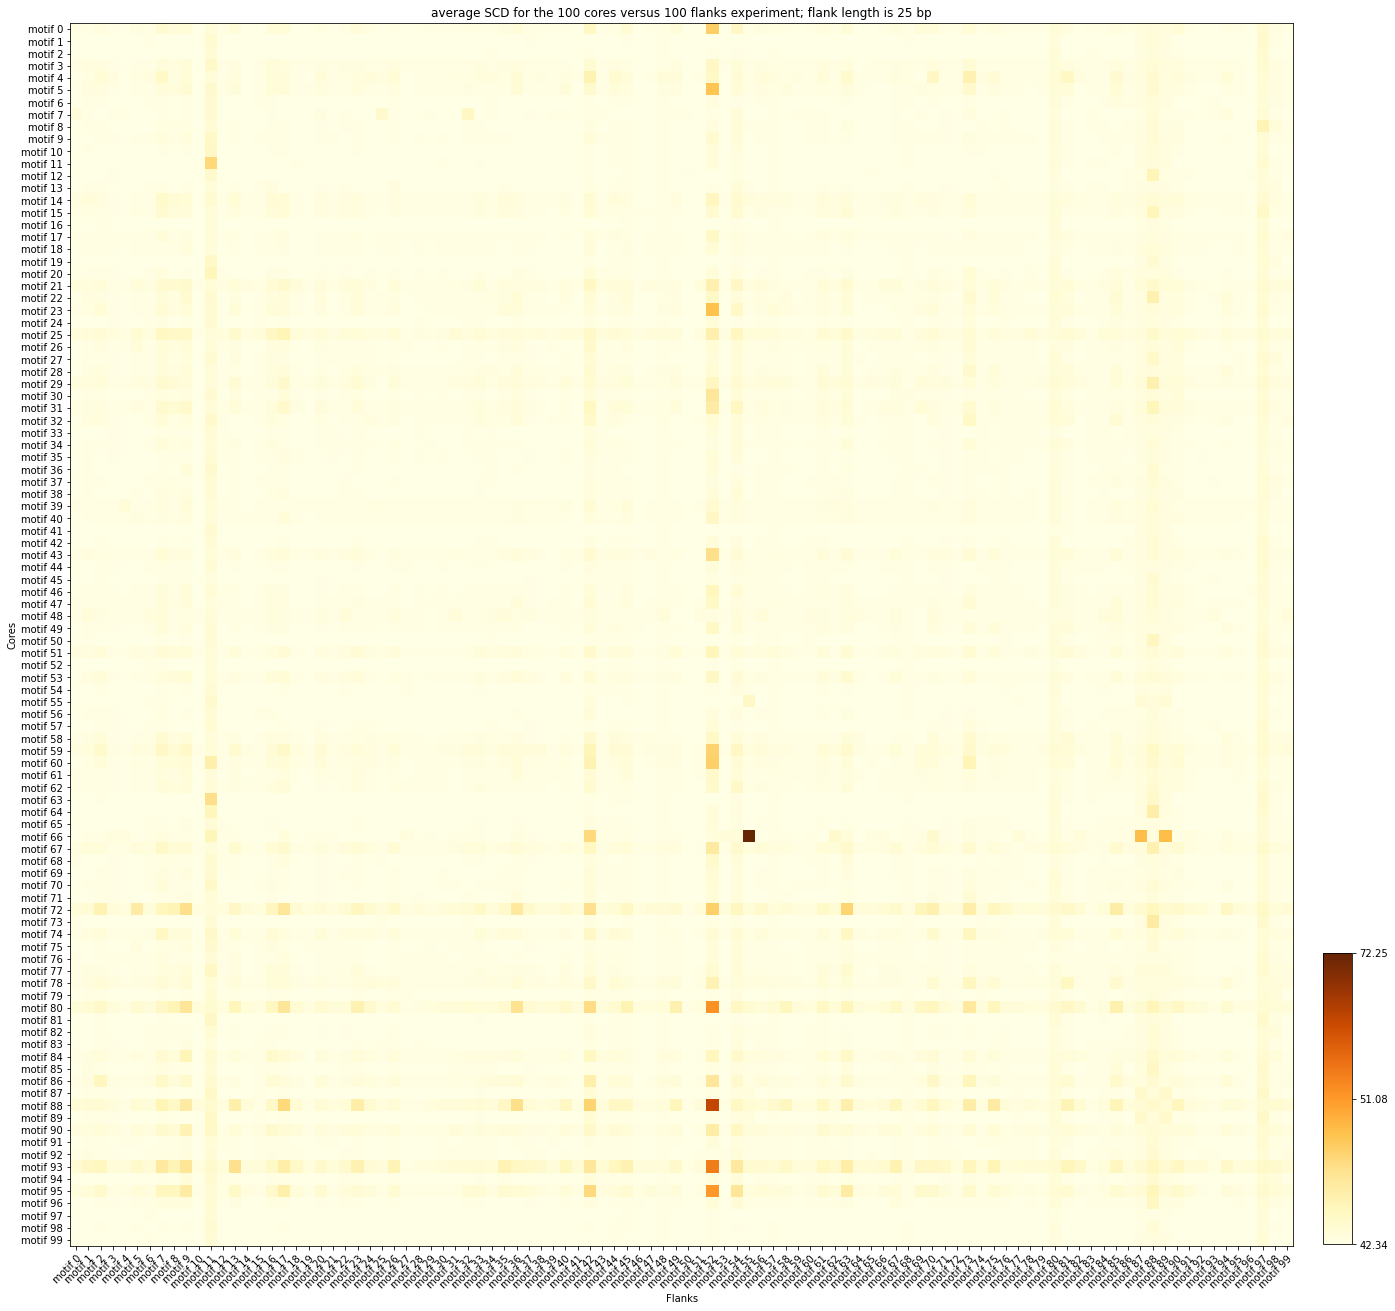

In [24]:
fig, ax = plt.subplots()
im = ax.imshow(summary_matrix, cmap="YlOrBr")

fig.set_figheight(22.5)
fig.set_figwidth(23)

ax.set_xticks(np.arange(len(all_names)), labels=all_names)
ax.set_yticks(np.arange(len(all_names)), labels=all_names)

ax.set_ylabel('Cores')
ax.set_xlabel('Flanks')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.set_title("average SCD for the 100 cores versus 100 flanks experiment; flank length is 25 bp")

cax = plt.axes([0.90, 0.126, 0.0175, 0.18])
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap="YlOrBr"), cax=cax, ticks=[0, 0.5, 1])

cbar.ax.set_yticklabels([str(round(np.min(summary_matrix),2)), 
                         str(round((np.max(summary_matrix) - np.min(summary_matrix)/2),2)), 
                         str(round(np.max(summary_matrix),2))])

# plt.savefig("100vs100medium_matplot.png")
plt.show()


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
pca.fit(summary_matrix)

In [ ]:
print(pca.explained_variance_ratio_)

In [ ]:
pca_values = pca.components_

In [ ]:
pca_values.shape

In [ ]:
plt.figure(figsize=(14,14))

x = pca_values[0,]
y = pca_values[1,]

plt.scatter(x, y)

for i in range(pca_values.shape[1]):
    plt.text(x[i]+0.001, y[i], all_names[i].split(' ')[1],horizontalalignment='left', color='black')

plt.xlabel("1st PC")
plt.ylabel("2nd PC")

# plt.savefig("100vs100_PCA.png")

plt.show()

In [ ]:
# average for each core
cores_ave = summary_matrix.mean(1)

In [ ]:
# average for each flank set
flanks_ave = summary_matrix.mean(0)

In [ ]:
# the more yellow, the higher value of the average SCD

In [ ]:
plt.figure(figsize=(14,14))

x = pca_values[0,]
y = pca_values[1,]

plt.scatter(x, y, c=cores_ave)

for i in range(pca_values.shape[1]):
    plt.text(x[i]+0.001, y[i], all_names[i].split(' ')[1],horizontalalignment='left', color='black')

plt.xlabel("1st PC")
plt.ylabel("2nd PC")

# plt.savefig("100vs100_PCA_ave_cores.png")

plt.show()

In [ ]:
plt.figure(figsize=(14,14))

x = pca_values[0,]
y = pca_values[1,]

plt.scatter(x, y, c=flanks_ave)

for i in range(pca_values.shape[1]):
    plt.text(x[i]+0.001, y[i], all_names[i].split(' ')[1],horizontalalignment='left', color='black')

plt.xlabel("1st PC")
plt.ylabel("2nd PC")

plt.savefig("100vs100_PCA_ave_flanks.png")

plt.show()